<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1">Data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2">Exploratory Data Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Split-the-data---input-and-target" data-toc-modified-id="Split-the-data---input-and-target-2.0.1">Split the data - input and target</a></span></li><li><span><a href="#Inspecting-the-data-distribution-by-data-type" data-toc-modified-id="Inspecting-the-data-distribution-by-data-type-2.0.2">Inspecting the data distribution by data type</a></span></li><li><span><a href="#Numerical-data-distribution" data-toc-modified-id="Numerical-data-distribution-2.0.3">Numerical data distribution</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.1">Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Discrete-feature-distribution" data-toc-modified-id="Discrete-feature-distribution-2.1.1">Discrete feature distribution</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-2.1.2">Encoding</a></span></li><li><span><a href="#Label-sequencing" data-toc-modified-id="Label-sequencing-2.1.3">Label sequencing</a></span></li></ul></li></ul></li></ul></div>

# Exploratory Data Analysis

In [33]:
import pandas as pd
import numpy as np

In [292]:
repo_url = 'https://raw.githubusercontent.com/philip-papasavvas/ml_sandbox'
df = pd.read_csv(f"{repo_url}/main/data/BankChurners.csv")

In [293]:
# drop columns
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

df = df.drop(columns_to_drop, axis=1)

### Split the data - input and target
Now we will split the data into the input data, and the target variable.

In [294]:
input_columns = [x for x in df.columns if 'Attrition_Flag' not in x]
X = df.loc[:, input_columns]

y = df['Attrition_Flag'] # target label
y.replace({'Attrited Customer': 1, # binary values are clearer labels of churn/no churn
           'Existing Customer': 0},
          inplace=True)

There are lots of different input features, so let's get some intuition on what these features represent:
- `CLIENTNUM`: client number, the unique identifier for each account holder
- `Customer_Age`: age (in years) of account holder
- `Gender`: male M, female F
- `Dependent_count`: number of dependents of the account holder
- `Education_level`: highest qualification of the account holder (eg: 'High School', 'Graduate', 'Uneducated')
- `Marital_status`: status of account holdder (married, single, divorced or unknown(
- `Income_Category`: annual income of account holder ('$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K','$120K +', 'Unknown')
- `Card_Category`: type of card the account holder has ('Blue', 'Gold', 'Silver', 'Platinum')
- `Months_on_book`: period account holder has been with the bank
- `Total_Relationship_Count`: total number of products held by the account holder
- `Months_Inactive_12_mon`: number of months the account holder has been inactive in the last 12
- `Contacts_Count_12_mon`: number of contacts in the last 12 months
- `Credit_Limit`: monthly credit limit
- `Total_Revolving_Bal`: total revolving balance on the credit card
- `Avg_Open_To_Buy`: the amount of credit available over the last 12 months
- `Total_Amt_Chng_Q4_Q1`: change in transaction amount, Q4 divided by Q1
- `Total_Trans_Amt`: total transaction amount over the last 12 months
- `Total_Trans_Ct`: total transaction count over the last 12 months
- `Total_Ct_Chng_Q4_Q1`: change in transaction count, Q4 divided by Q1
- `Avg_Utilization_Ratio`: average card utilisation ratio (amount of revolving credit being used divided by total amount of revolving credit available)

The target variable is:
- `Attrition_Flag`: whether the account holder has churned or not, with churn label as 'Attrited Customer', non-churn as 'Existing Customer'


In [58]:
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [62]:
y.value_counts()/len(y)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

### Simple Modelling Approach
Let's fit a basic logistic regression model, and we can add more complexity to the model as we go on.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 

In [21]:
X.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Most basic example of a model, with two variables - age and number of dependents

In [27]:
new_X, new_y = X[['Customer_Age', 'Dependent_count']], y

X_train, X_test, y_train, y_test = train_test_split(
    new_X, new_y, 
    test_size=0.2, # 20% of the data will be used to test the model accuracy
    random_state=1,
    stratify=y) 

In [28]:
clf_one = LogisticRegression(random_state=0).fit(X_train, y_train)

In [29]:
x_test_pred = clf_one.predict(X_test)

In [30]:
x_test_logistic_accuracy = accuracy_score(y_true=y_test, y_pred=x_test_pred)
print(f"Accuracy score for the test set was {100*x_test_logistic_accuracy:.2f}% \n ")

Accuracy score for the test set was 83.96% 
 


Accuracy can be misleading in this case, as it doesn't give us details on the score predictions for the different classes.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(input_matrix: np.ndarray, labels=None, title: str = None):
    """Seaborn plot of the confusion matrix, given labels (if so)"""
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
        
    fig, ax = plt.subplots()
    fig = plt.figure(figsize=(8,8))
    sns.heatmap(data=input_matrix, xticklabels=labels, yticklabels=labels, ax=ax,
               cmap='YlGnBu', annot=True, fmt='g',
               annot_kws={'size': 16})
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")
    plt.close()
        
    return fig      

<Figure size 576x576 with 0 Axes>

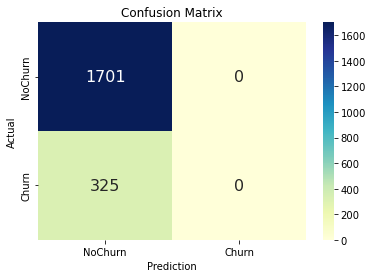

In [72]:
plot_confusion_matrix(input_matrix=confusion_matrix(y_true=y_test, y_pred=x_test_pred),
                      labels=['NoChurn', 'Churn']
                     )

This is not a very useful confusion matrix as all of the predictions are 'NoChurn'. Let's try to add some more features and see if this changes the accuracy of the model.

### Encode nominal variables
Now let's encode some of the nominal variables, such as the gender.

In [73]:
X['Gender'].unique()

array(['M', 'F'], dtype=object)

In [74]:
X['IsMale'] = np.where(X['Gender'] == 'M',
                       True,
                       False)

Re-train the model with an extra feature

In [75]:
new_X, new_y = X[['Customer_Age', 'Dependent_count', 'IsMale']], y
# new_X, new_y = X[['Customer_Age', 'Dependent_count']], y

X_train, X_test, y_train, y_test = train_test_split(
    new_X, new_y, 
    test_size=0.2, # 20% of the data will be used to test the model accuracy
    random_state=2,
    stratify=y) 

In [77]:
clf_two = LogisticRegression(random_state=2).fit(X_train, y_train)
x_test_pred = clf_two.predict(X_test)

x_test_logistic_accuracy = accuracy_score(y_true=y_test, y_pred=x_test_pred)
print(f"Accuracy score for the test set was {100*x_test_logistic_accuracy:.2f}% \n ")

Accuracy score for the test set was 83.96% 
 


The accuracy score seems similar to the previous one. Let's inspect the confusion matrix again...

<Figure size 576x576 with 0 Axes>

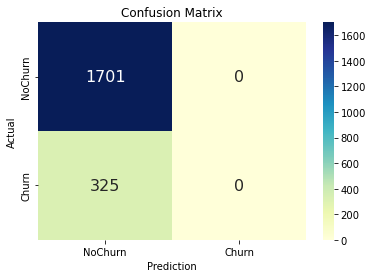

In [79]:
plot_confusion_matrix(input_matrix=confusion_matrix(y_true=y_test, y_pred=x_test_pred),
                      labels=['NoChurn', 'Churn']
                     )

Again no change to the prediction of output classes, so let's add some more complexity to the model.

### Encoding variables
We have both ordinal and nominal variables in the dataset, for example `Education_Level` is ordinal, as is `Income_Category`. Whilst the `Card_Category` and `Gender` variables are nominal variables.
Thus, we will use encoding to help us solve this issue and encode the discrete data into a numeric format
- **Label encoding for ordinal variables**
    - Convert each different value in a column to a number. 
    - For example, for the variable `Income_Category`, we assign the labels
        - Less than $40K: 0
        - 40-60K: 1
        - 60-80K: 2
        - 80-120K: 3
- **One Hot encoding for nominal variables:** 
    - in this approach, each category value is converted to a new column and assigned a `1` (True) or `0` (False) for each column. 
    - For example for `Gender`, the new column could be `Gender_M`, with a value of `1` where the original `Gender` variable was equal to `M`, and a value of `0` for `F`.


These dummy variables to encode the data to a numeric format. This can enable us to use a single regression equation representing multiple groups, and avoids the need for separate equations for each subgroup (gender, for example).

Using the dummy variable will encode the original variables as `0` or `1` to indicate the absence or presence of a categorical effect that could change whether the customer has **churned** or not.

### Label sequencing
Depending on the data values and the type of data, using **label encoding** can introduce a new problem due to the number sequencing. In the above example there might be a comparison between the different numbers 0/1/2/3 indicating the `Income_Category` variable. In this case the comparison is fair, in that the label `2` does specify higher income than someone with the label `0`, however this may not be the case each time. For example, for the `Card_Category` variable, let's inspect the different values.

In [81]:
df_discrete = X.select_dtypes(include='object')
df_discrete.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [16]:
df_discrete['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In this case, had one not known the value of `Gold` relative to `Silver` or `Platinum`, they might not understand the hierarchy that exists, so we would prefer to use a new variable that doesn't discriminate between the categories.

To avoid the above issues with label sequencing and importance, we will use the dummy value approach, allowing encoding across many category columns, and allows the flexibility of labeling the columns using a prefix.

In [96]:
# transform the discrete features into dummy variables
discrete_cols = [x for x in df_discrete.columns]
for colmn in discrete_cols:
    dummy_columns = pd.get_dummies(df[colmn], drop_first=False, prefix=colmn)
    # join the dummy columns to the dataframe
    df = pd.concat([df, dummy_columns], axis=1)
    df.drop(columns=colmn, inplace=True)

In [98]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0


In [109]:
df.dtypes.T

CLIENTNUM                           int64
Attrition_Flag                      int64
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_F                            uint8
Gender_M                            uint8
Education_Level_College             uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated        

Now, we no longer have categorical/ordinal discrete data points, as everything has been converted into dummy variables.
We should, however drop `Gender_M` as a variable as the data is contained in the `Gender_F` variable also.

In [115]:
modelling_df = df.drop(columns=['CLIENTNUM', 'Gender_M'], axis=1)
modelling_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,...,0,0,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,...,1,0,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,...,0,0,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,...,0,1,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,...,0,0,0,0,1,0,0,0,1,0,0,0


## Split the dataset and train the model

In [155]:
y = modelling_df['Attrition_Flag']
X = modelling_df.drop('Attrition_Flag', axis=1)

In [156]:
pd.set_option('display.max_columns', 25)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,...,0,0,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,...,1,0,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,...,0,0,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,...,0,1,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,...,0,0,0,0,1,0,0,0,1,0,0,0


In [157]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

### Feature Scaling
Before we train the model we should apply feature scaling to the data - this will either be normalisation/standardisation. Therefore, we can either scale the data through normalisation to have the numerical values in the range `[0-1]`, or standardise the data to have a mean of `0` and a standard deviation of `1`.

In [158]:
X.head().T

,0,1,2,3,4
Customer_Age,45.000,49.000,51.000,40.000,40.000
Dependent_count,3.000,5.000,3.000,4.000,3.000
Months_on_book,39.000,44.000,36.000,34.000,21.000
Total_Relationship_Count,5.000,6.000,4.000,3.000,5.000
Months_Inactive_12_mon,1.000,1.000,1.000,4.000,1.000
Contacts_Count_12_mon,3.000,2.000,0.000,1.000,0.000
Credit_Limit,12691.000,8256.000,3418.000,3313.000,4716.000
Total_Revolving_Bal,777.000,864.000,0.000,2517.000,0.000
Avg_Open_To_Buy,11914.000,7392.000,3418.000,796.000,4716.000
Total_Amt_Chng_Q4_Q1,1.335,1.541,2.594,1.405,2.175


In [180]:
# the following columns need to be feature scaled:
cols_to_scale = [
           'Customer_Age',  'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
       ]
cols_no_scale = [x for x in modelling_df.columns if x not in cols_to_scale]
cols_no_scale.remove('Attrition_Flag')

In [181]:
X[cols_to_scale].head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [182]:
cols_no_scale

['Gender_F',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

In [183]:
X[cols_to_scale].shape

(10127, 14)

In [184]:
X[cols_no_scale].shape

(10127, 22)

In [211]:
from sklearn.preprocessing import StandardScaler
scaler_func = StandardScaler()
X_std_scaled = scaler_func.fit_transform(X[cols_to_scale])

In [212]:
X_scaled = pd.DataFrame(X_std_scaled, columns = cols_to_scale)

In [213]:
X[cols_no_scale].head()

,Gender_F,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [188]:
X_scaled.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [200]:
pd.options.display.float_format = '{:,.2f}'.format 
X_scaled.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,"10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00"
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.54,-1.81,-2.87,-1.81,-2.32,-2.22,-0.79,-1.43,-0.82,-3.47,-1.15,-2.34,-2.99,-1.00
25%,-0.66,-1.04,-0.62,-0.52,-0.34,-0.41,-0.67,-0.99,-0.68,-0.59,-0.66,-0.85,-0.55,-0.91
50%,-0.04,-0.27,0.01,0.12,-0.34,-0.41,-0.45,0.14,-0.44,-0.11,-0.15,0.09,-0.04,-0.36
75%,0.71,0.50,0.51,0.76,0.65,0.49,0.27,0.76,0.26,0.45,0.10,0.69,0.44,0.83
max,3.33,2.04,2.51,1.41,3.62,3.20,2.85,1.66,2.98,12.03,4.14,3.16,12.61,2.63


Looks like the scaling worked nicely, and all of the values are centred around 0 with standard deviation of 1.

In [201]:
X = pd.concat([X_scaled, X[cols_no_scale]], axis=1)

In [202]:
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, # 20% of the data will be used to test the model accuracy
    random_state=0,
    stratify=y) 

In [204]:
clf_three = LogisticRegression(random_state=0).fit(X_train, y_train)
x_test_pred = clf_three.predict(X_test)

x_test_logistic_accuracy = accuracy_score(y_true=y_test, y_pred=x_test_pred)
print(f"Accuracy score for the test set was {100*x_test_logistic_accuracy:.2f}% \n ")

Accuracy score for the test set was 90.77% 
 


The accuracy score has improved from 83.9% before, but let's see if using a different scaling mechanism can give better results.

<Figure size 576x576 with 0 Axes>

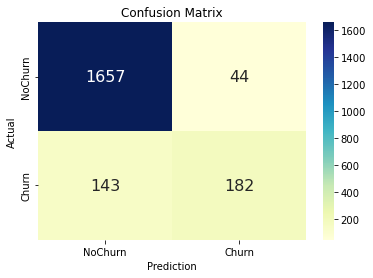

In [205]:
plot_confusion_matrix(input_matrix=confusion_matrix(y_true=y_test, y_pred=x_test_pred),
                      labels=['NoChurn', 'Churn']
                     )

The accuracy score has improved from 83.9% before, but let's see if using a different scaling mechanism can give better results.

### Tidy up functions for running the machine learning approach

In [229]:
def train_logistic_regression(X_in: pd.DataFrame, 
                              y_in: pd.DataFrame, 
                              test_size: float = 0.2) -> dict:
    """Wrapper function to train and test the data"""

    X_train, X_test, y_train, y_test = train_test_split(
        X_in, y_in, 
        test_size=test_size,
        random_state=0,
        stratify=y) 

    new_regression = LogisticRegression(random_state=0).fit(X_train, y_train)
    x_test_predictions = new_regression.predict(X_test)

    x_test_accuracy = accuracy_score(y_true=y_test, y_pred=x_test_predictions)
    print(f"Accuracy score for the test set was {100*x_test_accuracy:.2f}% \n ")
    
    plot_confusion_matrix(input_matrix=confusion_matrix(y_true=y_test, y_pred=x_test_predictions),
                          labels=['NoChurn', 'Churn']
                         )
    
    return {'model': new_regression,
            'test_accuracy': x_test_logistic_accuracy
           }

### Apply Normalisation
Now use the MinMax scaler to see if it has any impact on the results, so the numerical values will vary between 0 and 1.

In [223]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler_func = MinMaxScaler()
X_std_minmax = minmax_scaler_func.fit_transform(X[cols_to_scale])

In [224]:
X_scaled_minmax = pd.DataFrame(X_std_minmax, columns = cols_to_scale)

In [225]:
X_scaled_minmax.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.40,0.60,0.60,0.80,0.17,0.50,0.34,0.31,0.35,0.39,0.04,0.25,0.44,0.06
1,0.49,1.00,0.72,1.00,0.17,0.33,0.21,0.34,0.21,0.45,0.04,0.18,1.00,0.11
2,0.53,0.60,0.53,0.60,0.17,0.00,0.06,0.00,0.10,0.76,0.08,0.08,0.63,0.00
3,0.30,0.80,0.49,0.40,0.67,0.17,0.06,1.00,0.02,0.41,0.04,0.08,0.63,0.76
4,0.30,0.60,0.19,0.80,0.17,0.00,0.10,0.00,0.14,0.64,0.02,0.14,0.67,0.00


In [226]:
X_scaled_minmax.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,"10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00"
mean,0.43,0.47,0.53,0.56,0.39,0.41,0.22,0.46,0.22,0.22,0.22,0.43,0.19,0.28
std,0.17,0.26,0.19,0.31,0.17,0.18,0.27,0.32,0.26,0.06,0.19,0.18,0.06,0.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.32,0.20,0.42,0.40,0.33,0.33,0.03,0.14,0.04,0.19,0.09,0.27,0.16,0.02
50%,0.43,0.40,0.53,0.60,0.33,0.33,0.09,0.51,0.10,0.22,0.19,0.44,0.19,0.18
75%,0.55,0.60,0.63,0.80,0.50,0.50,0.29,0.71,0.29,0.25,0.24,0.55,0.22,0.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [227]:
X = pd.concat([X_scaled_minmax, X[cols_no_scale]], axis=1)

Accuracy score for the test set was 90.97% 
 


/Users/philip_p/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


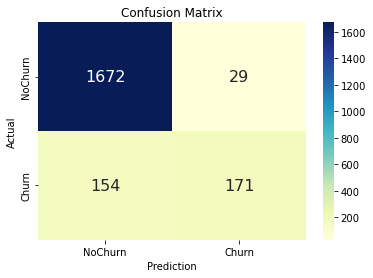

In [230]:
out_dict = train_logistic_regression(X_in=X,
                                     y_in=y)

### Numerical distributions
Plot the histograms of the numerical variables to understand the distributions

In [244]:
df_numeric = modelling_df.select_dtypes(include=['float64', 'int64']).copy()
df_numeric.drop('Attrition_Flag', axis=1, inplace=True)
df_numeric.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06
1,49,5,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10
2,51,3,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00
3,40,4,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76
4,40,3,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00


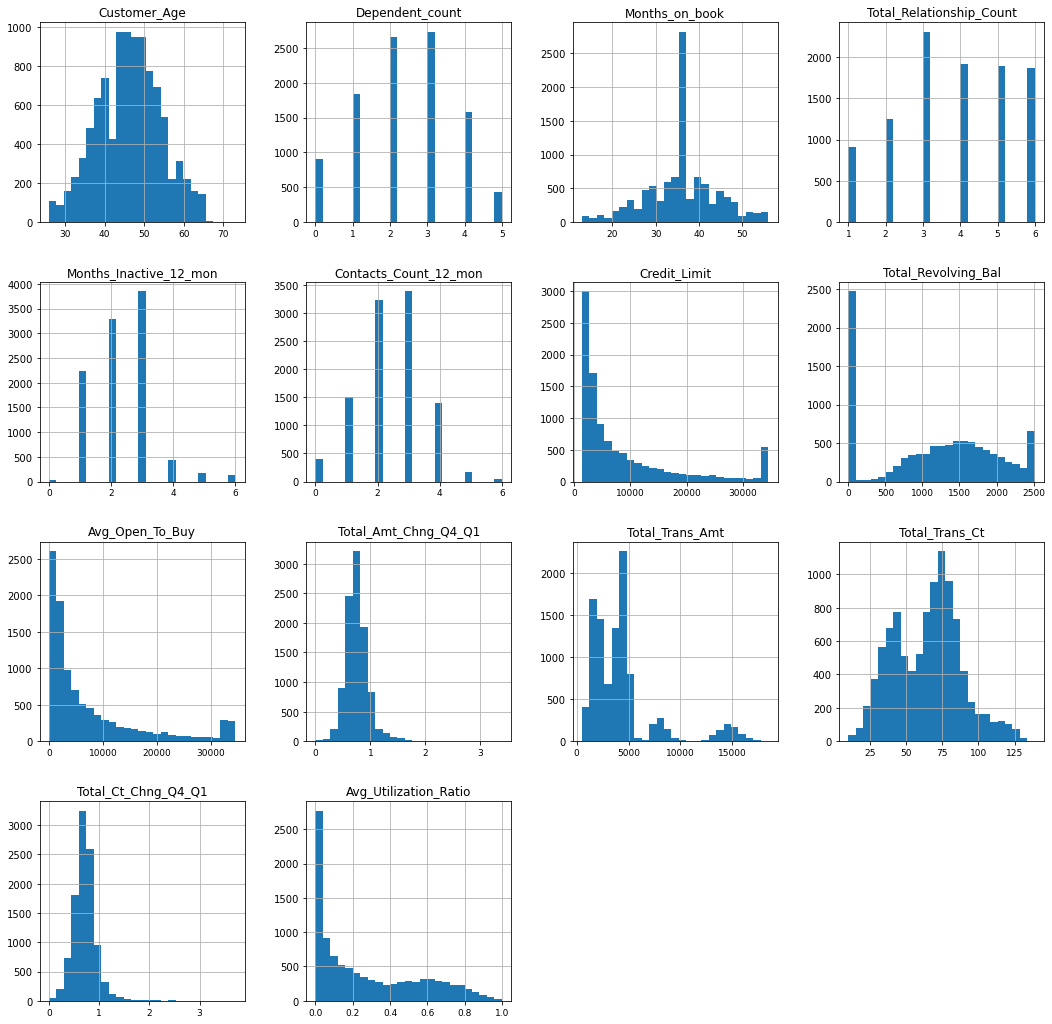

In [245]:
df_numeric.hist(figsize=(18,18), bins=25, xlabelsize=9, ylabelsize=10);
# add the semi-colon removed the matplotlib verbose information

We see that some variables follow a Gaussian distribution, whilst others have a non-Gaussian distribution:
- *Gaussian Distribution* - Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1
- *Non-Gaussian Distribution* - Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio

### Now we can normalise the non-Gaussian features and standardize the Gaussian-like features
To apply this, we will use the Column Transformer, and Pipeline concepts from **scikit-learn** to do the mixed techniques by subsetting the columns.

In [247]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [248]:
modelling_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,...,0,0,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,...,1,0,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,...,0,0,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,...,0,1,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,...,0,0,0,0,1,0,0,0,1,0,0,0


In [250]:
df_discrete.columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [295]:
numeric_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]
discrete_features = [
    'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'
]

In [301]:
gaussian_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
     'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
     'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'
                    ]
non_gauss_features = [
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 
    'Avg_Utilization_Ratio'
]

discrete_features = [
    'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'
]

In [302]:
numeric_gauss_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())]
)

non_gauss_transformer = Pipeline(
    steps=[
        ('scaler', MinMaxScaler())]
)

discrete_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
        )

In [303]:
preprocessor = ColumnTransformer(
    transformers=[
        ('gaussian', numeric_gauss_transformer, gaussian_features),
        ('non-gaussian', non_gauss_transformer, non_gauss_features),
        ('one-hot', discrete_transformer, discrete_features)
    ]
)

In [304]:
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs'))
]
                     )

In [305]:
input_columns = [x for x in df.columns if 'Attrition_Flag' not in x]
X = df.loc[:, input_columns]
X.drop(['CLIENTNUM'], axis=1, inplace=True)

y = df['Attrition_Flag'] # target label
y.replace({'Attrited Customer': 1, # binary values are clearer labels of churn/no churn
           'Existing Customer': 0},
          inplace=True)

In [314]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, # 20% of the data will be used to test the model accuracy
    random_state=5,
    stratify=y) 

In [315]:
X_train.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [316]:
classifier.fit(X_train,y_train)

/Users/philip_p/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gaussian',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1']),
                                                 ('non-gaussian',
                                                  Pipeline(steps=[('scaler',
        

In [317]:
classifier_pred = classifier.predict(X_test)

In [318]:
mixed_accuracy_score = accuracy_score(y_true=y_test, y_pred=classifier_pred)
print(f"Accuracy score for the test set was {100*mixed_accuracy_score:.2f}% \n ")

Accuracy score for the test set was 89.44% 
 


https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer